# **Welcome to Employee Salary Prediction using K-Nearest Neighbor (*KNN*)**

### *In this project, we aim to predict whether an individual earns more or less than $50K per year based on various attributes using the K-Nearest Neighbors (KNN) algorithm.*



# Problem Statement

1.   This project focuses on predicting the salary range of employees based on their demographic and work-related features.
2.   The data includes attributes like age, education, occupation, hours per week, etc.
3. The goal is to help organizations gain insights into salary patterns.
4. We are not solving or suggesting policy decisions; this is purely predictive.
5. The outcome is a classification: <=50K or >50K.








### Mounting Google Drive

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing Necessary Libraries

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 ### Loading Dataset and taking a look at the dataset


In [68]:
data=pd.read_csv("/content/drive/MyDrive/edunet-AI/adult 3.csv")
data.head(15)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [69]:
data.shape

(48842, 15)

## Checking missing values


In [70]:
data.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


### Checking unwanted values

In [71]:
print(data.workclass.value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


### Replacing unwanted values

In [72]:

data.workclass.replace({'?':'Others'},inplace=True)
print('Workclass')
print(data['workclass'].value_counts())

Workclass
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


/tmp/ipython-input-72-2898669239.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.workclass.replace({'?':'Others'},inplace=True)


In [73]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Others,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [74]:
print(data['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [75]:
print(data.education.value_counts())

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64


In [76]:
print(data['marital-status'].value_counts())

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64


In [77]:
print(data.occupation.value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [78]:
data.occupation.replace({'?':'Others'},inplace=True)

/tmp/ipython-input-78-2426378524.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.occupation.replace({'?':'Others'},inplace=True)


### Finding and handling outliers

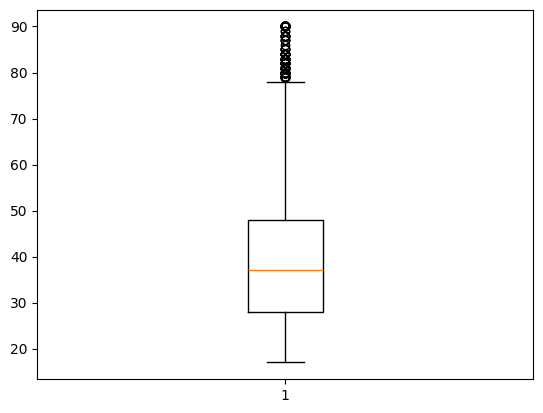

In [79]:
plt.boxplot(data['age'])
plt.show()

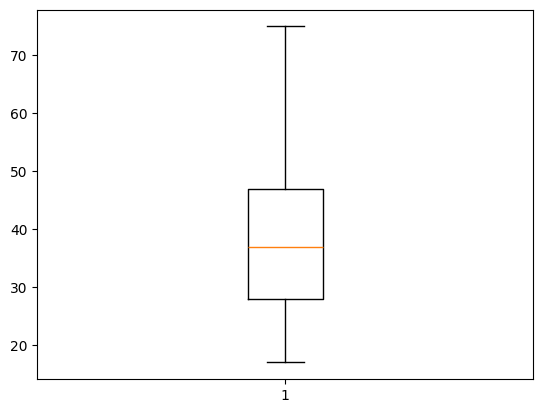

In [80]:
data=data[(data['age']<=75) & (data['age']>=17)]

plt.boxplot(data['age'])
plt.show()

In [81]:
# Outliers removing/ dataset cleaning by mutual understanding

In [82]:
data.workclass.value_counts()


,count
workclass,
Private,33756
Self-emp-not-inc,3796
Local-gov,3110
Others,2700
State-gov,1979
Self-emp-inc,1669
Federal-gov,1428
Without-pay,21
Never-worked,10


In [83]:
# in the above code 'without-pay and 'never-worked' having very less count as well as they are not earning
# so not required for income prediction
# so we can remove such data
data=data[data['workclass']!='Without-pay']
data=data[data['workclass']!='Never-worked']


In [84]:
data.shape

(48438, 15)

In [85]:
data.education.value_counts()

,count
education,
HS-grad,15655
Some-college,10824
Bachelors,7983
Masters,2634
Assoc-voc,2053
11th,1801
Assoc-acdm,1592
10th,1373
7th-8th,899


In [86]:
# here also we can eliminate some categories like '1st-4th','5th-6th','Preschool'
data=data[data['education']!='1st-4th']
data=data[data['education']!='5th-6th']
data=data[data['education']!='Preschool']

In [87]:
data.shape

(47619, 15)

In [88]:
# now the 'education' and 'education-num' are giving us same information so we will keep only one of them
# here i will remove the text data column 'education'
data.drop(columns=['education'],inplace=True)
data.columns


Index(['age', 'workclass', 'fnlwgt', 'educational-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [89]:
data

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Others,103497,10,Never-married,Others,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Converting Categorical or text data columns into Numerical using Encoding Technique


In [90]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['workclass']=encoder.fit_transform(data['workclass'])
data['marital-status']=encoder.fit_transform(data['marital-status'])
data['occupation']=encoder.fit_transform(data['occupation'])
data['relationship']=encoder.fit_transform(data['relationship'])
data['race']=encoder.fit_transform(data['race'])
data['gender']=encoder.fit_transform(data['gender'])
data['native-country']=encoder.fit_transform(data['native-country'])
data

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,7,4,6,3,2,1,0,0,40,39,<=50K
1,38,3,89814,9,2,4,0,4,1,0,0,50,39,<=50K
2,28,1,336951,12,2,11,0,4,1,0,0,40,39,>50K
3,44,3,160323,10,2,6,0,2,1,7688,0,40,39,>50K
4,18,2,103497,10,4,8,3,4,0,0,0,30,39,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,12,2,13,5,4,0,0,0,38,39,<=50K
48838,40,3,154374,9,2,6,0,4,1,0,0,40,39,>50K
48839,58,3,151910,9,6,0,4,4,0,0,0,40,39,<=50K
48840,22,3,201490,9,4,0,3,4,1,0,0,20,39,<=50K


### Spliting data in to X(independent variable) and Y (dependent variable)

In [91]:
X=data.drop(columns=['income'])
Y=data['income']
X

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,3,226802,7,4,6,3,2,1,0,0,40,39
1,38,3,89814,9,2,4,0,4,1,0,0,50,39
2,28,1,336951,12,2,11,0,4,1,0,0,40,39
3,44,3,160323,10,2,6,0,2,1,7688,0,40,39
4,18,2,103497,10,4,8,3,4,0,0,0,30,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,12,2,13,5,4,0,0,0,38,39
48838,40,3,154374,9,2,6,0,4,1,0,0,40,39
48839,58,3,151910,9,6,0,4,4,0,0,0,40,39
48840,22,3,201490,9,4,0,3,4,1,0,0,20,39


In [92]:
Y

,income
0,<=50K
1,<=50K
2,>50K
3,>50K
4,<=50K
...,...
48837,<=50K
48838,>50K
48839,<=50K
48840,<=50K


### Scaller will convert entire data in one range that is 0 to 1

In [93]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
X

array([[0.13793103, 0.5       , 0.14512876, ..., 0.        , 0.39795918,
        0.95121951],
       [0.36206897, 0.5       , 0.05245126, ..., 0.        , 0.5       ,
        0.95121951],
       [0.18965517, 0.16666667, 0.21964867, ..., 0.        , 0.39795918,
        0.95121951],
       ...,
       [0.70689655, 0.5       , 0.09446153, ..., 0.        , 0.39795918,
        0.95121951],
       [0.0862069 , 0.5       , 0.12800425, ..., 0.        , 0.19387755,
        0.95121951],
       [0.60344828, 0.66666667, 0.18648211, ..., 0.        , 0.39795918,
        0.95121951]])

### Splitting of Dataset into Training data and Testing data

In [94]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=23,stratify=Y)
# here random_state=True suggest that the records getting choosen for trainning
# and testing will be in random order
# statify=Y we use only for classification task
# statify maintans the catagorical ratio in output column(Y) while getting choosen for trainning and testing

### Training and Predicting KNN model

In [103]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)


KNeighborsClassifier()

In [104]:
predict=knn.predict(xtest)
predict

array(['<=50K', '<=50K', '>50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

### Evaluating model's performance

In [105]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(ytest,predict)
confusion_matrix(ytest,predict)
print(accuracy_score(ytest,predict))
print(classification_report(ytest,predict))

0.8167786644267114
              precision    recall  f1-score   support

       <=50K       0.87      0.90      0.88      7206
        >50K       0.64      0.57      0.60      2318

    accuracy                           0.82      9524
   macro avg       0.75      0.73      0.74      9524
weighted avg       0.81      0.82      0.81      9524



### Hyperparameter training using GridSearchCV

In [97]:
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier(n_jobs=-1)
param_grid={
    'n_neighbors':[3,5,7],
    'weights':['uniform', 'distance'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
}
gsv=GridSearchCV(knn,param_grid,n_jobs=-1,refit=True)
gsv.fit(xtrain,ytrain)
prediction=gsv.predict(xtest)
print(gsv.best_params_)
print(gsv.best_score_)
print(accuracy_score(ytest,prediction))

{'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'uniform'}
0.8303714398214987
0.8195086098278035


### Storing the KNN model in pickle




In [98]:
import pickle

# Save the knn model from GridSearchCV
with open('model.pkl', 'wb') as f:
    pickle.dump(gsv.best_estimator_, f)


### Integrating Streamlit for UI via Ngrok Tunnel

In [99]:
!pip install streamlit

### Writing into file : app.py for streamlit integration

In [108]:
%%writefile app.py
import streamlit as st
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load model
model = pickle.load(open('model.pkl', 'rb'))

st.set_page_config(page_title="Employee Salary Prediction Dashboard 💰", layout="wide")

st.title("Employee Salary Prediction Dashboard 💰✨")

# Features that user will input (visible in UI)
visible_features = {
    'age': (0, 100, 25),  # slider (min, max, default)
    'hours-per-week': (1, 100, 40),
    'workclass': ['Private', 'Self-emp', 'Government', 'Other'],
    'education': ['HS-grad', 'Bachelors', 'Masters', 'Other'],
    'marital-status': ['Never-married', 'Married', 'Divorced', 'Other'],
    'occupation': ['Tech-support', 'Craft-repair', 'Other-service', 'Sales', 'Exec-managerial', 'Other'],
    'gender': ['Male', 'Female']
}

# Hidden features needed for model (no user input)
hidden_features = {
    'relationship': 'Not-in-family',
    'race': 'White',
    'native-country': 'United-States',
    'feature11': 0,
    'feature12': 0,
    'feature13': 0
}

# Encoding maps (for all features)
maps = {
    'workclass': {'Private': 0, 'Self-emp': 1, 'Government': 2, 'Other': 3},
    'education': {'HS-grad': 0, 'Bachelors': 1, 'Masters': 2, 'Other': 3},
    'marital-status': {'Never-married': 0, 'Married': 1, 'Divorced': 2, 'Other': 3},
    'occupation': {'Tech-support': 0, 'Craft-repair': 1, 'Other-service': 2, 'Sales': 3, 'Exec-managerial': 4, 'Other': 5},
    'relationship': {'Not-in-family': 0, 'Husband': 1, 'Wife': 2, 'Own-child': 3, 'Other': 4},
    'race': {'White': 0, 'Black': 1, 'Asian-Pac-Islander': 2, 'Other': 3},
    'gender': {'Male': 0, 'Female': 1},
    'native-country': {'United-States': 0, 'Mexico': 1, 'Other': 2}
}

col1, col2 = st.columns([1, 2])

with col1:
    st.header("Input Your Details")

    # Collect user inputs for visible features
    age = st.slider('Age', *visible_features['age'])
    hours = st.slider('Hours per week', *visible_features['hours-per-week'])
    workclass = st.selectbox('Workclass', visible_features['workclass'])
    education = st.selectbox('Education', visible_features['education'])
    marital_status = st.selectbox('Marital Status', visible_features['marital-status'])
    occupation = st.selectbox('Occupation', visible_features['occupation'])
    gender = st.selectbox('Gender', visible_features['gender'])

    # Prepare input dict for all features
    input_dict = {
        'age': age,
        'hours-per-week': hours,
        'workclass': maps['workclass'][workclass],
        'education': maps['education'][education],
        'marital-status': maps['marital-status'][marital_status],
        'occupation': maps['occupation'][occupation],
        'gender': maps['gender'][gender],
        # Hidden features set to default values here
        'relationship': maps['relationship'][hidden_features['relationship']],
        'race': maps['race'][hidden_features['race']],
        'native-country': maps['native-country'][hidden_features['native-country']],
        'feature11': hidden_features['feature11'],
        'feature12': hidden_features['feature12'],
        'feature13': hidden_features['feature13'],
    }

    input_data = pd.DataFrame([input_dict])

    if st.button("Predict Income"):
        prediction = model.predict(input_data)
        proba = model.predict_proba(input_data)[0][1]  # Probability >50K
        result = '>50K' if prediction[0] == 1 else '<=50K'
        st.success(f"Predicted Income: {result}")

        # Salary range estimation based on proba
        min_salary = int(20000 + proba * 50000)
        max_salary = min_salary + 20000
        st.slider("Estimated Salary Range (USD)", min_salary, max_salary, (min_salary, max_salary))

with col2:
    st.header("Input Summary & Visualizations")

    # Summary table for visible features only
    summary_df = pd.DataFrame({
        'Feature': ['Age', 'Hours per week', 'Workclass', 'Education', 'Marital Status', 'Occupation', 'Gender'],
        'Value': [age, hours, workclass, education, marital_status, occupation, gender]
    })
    st.table(summary_df)

    # PIE chart: Workclass distribution influenced by selected workclass
    labels = visible_features['workclass']
    base_sizes = [40, 20, 25, 15]

    # Highlight selected workclass by adding 10 count, just an example
    sizes = [count + (10 if label == workclass else 0) for label, count in zip(labels, base_sizes)]
    colors = ['#ff9999' if label == workclass else '#C8E6C9' for label in labels]

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
    ax1.axis('equal')
    st.pyplot(fig1)

    # HISTOGRAM: Education count, increase selected education count for fun
    edu_levels = visible_features['education']
    base_counts = [150, 120, 70, 30]
    counts = [count + (30 if level == education else 0) for level, count in zip(edu_levels, base_counts)]

    fig2, ax2 = plt.subplots()
    ax2.bar(edu_levels, counts, color=['#66b3ff' if level == education else '#C8E6C9' for level in edu_levels])
    ax2.set_title("Education Level Distribution")
    ax2.set_ylabel("Count")
    plt.xticks(rotation=45)
    st.pyplot(fig2)

    # LINE CHART: Hours per week vs Age (simulate based on current age and hours)
    ages = np.arange(20, 61, 5)
    # create a curve influenced by current 'hours' and 'age'
    hours_worked = 30 + (ages - age) * 0.5 + (hours - 40) * 0.3
    hours_worked = np.clip(hours_worked, 20, 60)  # keep reasonable range

    fig3, ax3 = plt.subplots()
    ax3.plot(ages, hours_worked, marker='o', linestyle='-', color='purple')
    ax3.set_title("Estimated Hours Worked per Week by Age")
    ax3.set_xlabel("Age")
    ax3.set_ylabel("Hours per week")
    st.pyplot(fig3)


Overwriting app.py


In [101]:
!ngrok config add-authtoken 306QR1oSk0mBJ6QlDAUNMihRKom_7ThDW4XyzSRCQm4omw2B

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [102]:
!pip install -q pyngrok

from pyngrok import ngrok
import time

# Kill any previous ngrok processes just in case
!pkill ngrok

# Run your Streamlit app in the background
!streamlit run app.py &>/content/log.txt &

# Give Streamlit a few seconds to start
time.sleep(5)

# Open ngrok tunnel on port 8501 (port as integer, not string)
url = ngrok.connect(8501)
print(f"App Link 👉 {url}")


App Link 👉 NgrokTunnel: "https://762fc8e9b690.ngrok-free.app" -> "http://localhost:8501"
